Found 1025 subjects.
Each subject is represented by a vector of length 6670.
Reduced dimension to 50 components.
Plotting persistence diagrams...


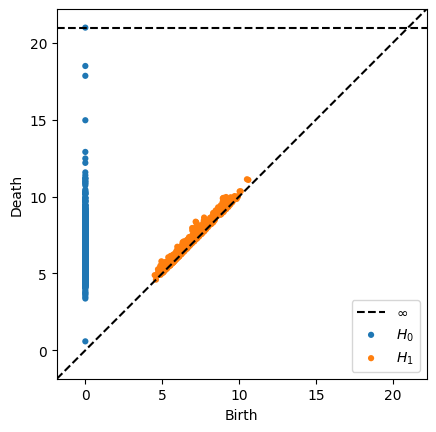

In [15]:
import os
import glob
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from ripser import ripser
from persim import plot_diagrams

from kmapper import KeplerMapper
from kmapper.cover import Cover
from sklearn.cluster import DBSCAN

base_dir = "./abide"
pattern = os.path.join(base_dir, "*", "*AAL116_correlation_matrix.mat")
mat_files = glob.glob(pattern)

subject_vectors = []
subject_ids = []

for mat_file in mat_files:
    mat_contents = scipy.io.loadmat(mat_file)
    corr = mat_contents.get('data')
    if corr is None:
        print(f"Warning: 'data' key not found in {mat_file}. Skipping.")
        continue
    if corr.shape == (116, 116):
        triu_indices = np.triu_indices_from(corr, k=1)
        vector = corr[triu_indices]
        subject_vectors.append(vector)
        subject_ids.append(os.path.basename(mat_file))
    else:
        print(f"Warning: Unexpected matrix shape {corr.shape} in {mat_file}. Skipping.")

subject_vectors = np.array(subject_vectors)
print(f"Found {len(subject_vectors)} subjects.")

if len(subject_vectors) == 0:
    print("No valid subjects found. Exiting.")
else:
    print(f"Each subject is represented by a vector of length {subject_vectors.shape[1]}.")

    n_components = 50
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(subject_vectors)
    print(f"Reduced dimension to {reduced_vectors.shape[1]} components.")

    ph_result = ripser(reduced_vectors)
    diagrams = ph_result['dgms']
    print("Plotting persistence diagrams...")
    plot_diagrams(diagrams, show=True)

In [16]:
    filter_pca = PCA(n_components=2)
    filter_values = filter_pca.fit_transform(reduced_vectors)

    mapper = KeplerMapper(verbose=1)

    cover = Cover(n_cubes=15, perc_overlap=0.3)
    
    clusterer = DBSCAN(eps=5, min_samples=3)
    
    graph = mapper.map(
        filter_values,
        reduced_vectors,
        cover=cover,
        clusterer=clusterer
    )

    output_html = "mapper_output.html"
    mapper.visualize(
        graph,
        path_html=output_html,
        title="ABIDE AAL116 TDA Mapper Graph"
    )
    print(f"Mapper graph saved to {output_html}.")
    print("TDA pipeline completed successfully.")

KeplerMapper(verbose=1)
Mapping on data shaped (1025, 50) using lens shaped (1025, 2)

Creating 225 hypercubes.

Created 39 edges and 24 nodes in 0:00:00.033262.
Wrote visualization to: mapper_output.html
Mapper graph saved to mapper_output.html.
TDA pipeline completed successfully.
